In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression  # machine learning
import statsmodels.api as sm # econometrics

df = pd.read_csv('nyc-rolling-sales_clean.csv')

In [11]:
rand_state = 1000

## EDA

In [12]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_year,sale_month
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,9
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,2016,9
2,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S3,10009,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,2016,11
3,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,K4,10009,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,2016,9
4,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,C4,10011,9,0,9,1566.0,6330.0,1901,2,C4,1583840.0,2017-08-31,2017,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30236 entries, 0 to 30235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         30236 non-null  object 
 1   NEIGHBORHOOD                    30236 non-null  object 
 2   BUILDING CLASS CATEGORY         30236 non-null  object 
 3   TAX CLASS AT PRESENT            30236 non-null  object 
 4   BUILDING CLASS AT PRESENT       30236 non-null  object 
 5   ZIP CODE                        30236 non-null  int64  
 6   RESIDENTIAL UNITS               30236 non-null  int64  
 7   COMMERCIAL UNITS                30236 non-null  int64  
 8   TOTAL UNITS                     30236 non-null  int64  
 9   LAND SQUARE FEET                30236 non-null  float64
 10  GROSS SQUARE FEET               30236 non-null  float64
 11  YEAR BUILT                      30236 non-null  int64  
 12  TAX CLASS AT TIME OF SALE       

In [6]:
# changing the variable types
df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors='coerce')
df['sale_month'] = pd.DatetimeIndex(df['SALE DATE']).month.astype("category")

In [13]:
# constructing the numerical variables:
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS","SALE PRICE"]

for col in numeric: 
    df[col] = df[col].astype('float64')

In [14]:
# constructing the categorical variables:
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical: 
    df[col] = df[col].astype("category")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30236 entries, 0 to 30235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         30236 non-null  category
 1   NEIGHBORHOOD                    30236 non-null  category
 2   BUILDING CLASS CATEGORY         30236 non-null  category
 3   TAX CLASS AT PRESENT            30236 non-null  category
 4   BUILDING CLASS AT PRESENT       30236 non-null  category
 5   ZIP CODE                        30236 non-null  category
 6   RESIDENTIAL UNITS               30236 non-null  float64 
 7   COMMERCIAL UNITS                30236 non-null  float64 
 8   TOTAL UNITS                     30236 non-null  float64 
 9   LAND SQUARE FEET                30236 non-null  float64 
 10  GROSS SQUARE FEET               30236 non-null  float64 
 11  YEAR BUILT                      30236 non-null  category
 12  TAX CLASS AT TIME 

In [16]:
non_categorical = df.select_dtypes(include=['float64']).columns.tolist()
non_categorical.remove('SALE PRICE')

categorics = df.select_dtypes(include = ['category', 'datetime64[ns]']).columns.tolist()

In [17]:
df.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
sale_year                         0
sale_month                        0
dtype: int64

In [18]:
df.duplicated().sum()

95

In [19]:
df.drop_duplicates(inplace = True)

Now we don't have any NA's or duplicates so we can move on to relationships, dummy variables, and removing outliers.

In [20]:
# setting the target as the log of sale price
df['Target'] = np.log(df['SALE PRICE'])

We should remove the original data because we could have multicollinearity issues. It also makes the model unneccessarily complex. 

In [23]:
# also removing sale year and sale date as they are the same as sale month
df.drop(columns=['SALE PRICE','SALE DATE','sale_year'], inplace=True)

## Removing Outliers

In [24]:
df.drop(categorics, axis=1)

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,sale_month,Target
0,10.0,0.0,10.0,2272.0,6794.0,9,15.185745
1,8.0,0.0,8.0,1750.0,4226.0,9,14.976421
2,3.0,1.0,4.0,1520.0,3360.0,11,15.009433
3,0.0,1.0,1.0,1218.0,3586.0,9,15.123843
4,9.0,0.0,9.0,1566.0,6330.0,8,14.275363
...,...,...,...,...,...,...,...
30231,2.0,0.0,2.0,11088.0,2160.0,12,13.381646
30232,2.0,0.0,2.0,2400.0,2575.0,11,13.017003
30233,2.0,0.0,2.0,2498.0,2377.0,4,13.217674
30234,2.0,0.0,2.0,4000.0,1496.0,7,13.038982


I decided to go conservative and do anything 2 standard deviations away and found a much better RMSE. 

In [25]:
from scipy import stats

(np.abs(stats.zscore(df.drop(categorics, axis=1))) <2)

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,sale_month,Target
0,True,True,True,True,True,True,False
1,True,True,True,True,True,True,False
2,True,True,True,True,True,True,False
3,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
30231,True,True,True,True,True,True,True
30232,True,True,True,True,True,True,True
30233,True,True,True,True,True,True,True
30234,True,True,True,True,True,True,True


In [26]:
(np.abs(stats.zscore(df.drop(categorics, axis=1))) <2).all(axis=1)

0        False
1        False
2        False
3        False
4         True
         ...  
30231     True
30232     True
30233     True
30234     True
30235    False
Length: 30141, dtype: bool

In [27]:
(np.abs(stats.zscore(df.drop(categorics, axis=1))) <2).all(axis=1).sum()

28521

In [28]:
df = df[(np.abs(stats.zscore(df.drop(categorics, axis=1))) <2).all(axis=1)]

/Users/claytonshaw/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

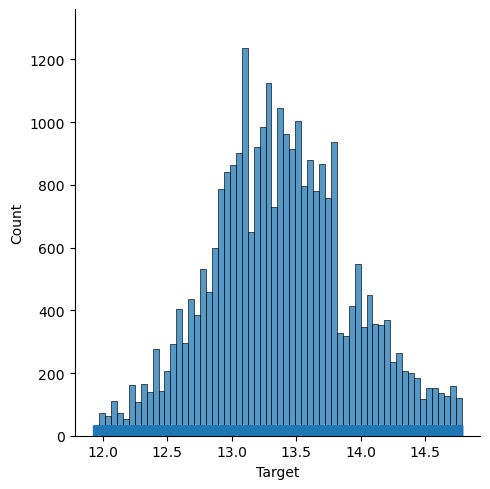

In [29]:
plt.figure(figsize=(12,6))
sns.displot(df['Target'], rug=True)
plt.show()

The data for sale price appears to be approximately normal. Lets check out the relationship between the variables

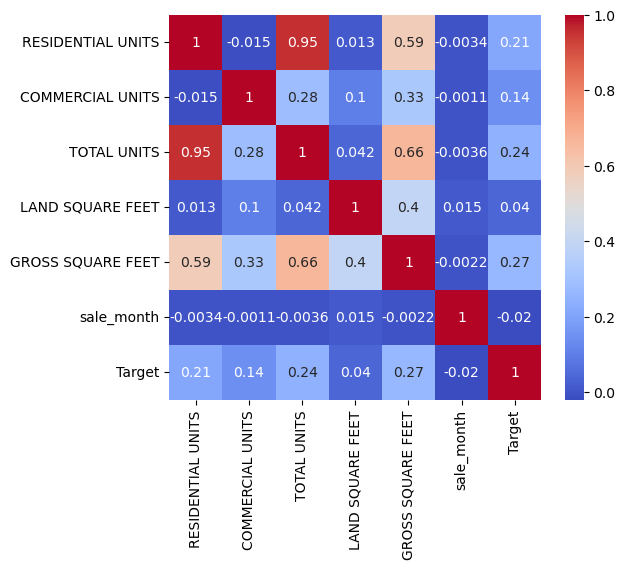

In [30]:
df_corr = df.drop(categorics, axis = 1)

plt.figure(figsize=(6,5))
sns.heatmap(df_corr.corr(), cmap='coolwarm',annot=True)
plt.show()

The Residential Units are highly correlated with Total Units indicating possible colinearity. 

In [31]:
cov_matrix = df_corr.cov()
cov_matrix

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,sale_month,Target
RESIDENTIAL UNITS,1.554080,-0.007498,1.541167,3.357217e+01,1.035728e+03,-0.014655,0.143476
COMMERCIAL UNITS,-0.007498,0.159524,0.146546,8.786830e+01,1.843597e+02,-0.001508,0.030915
TOTAL UNITS,1.541167,0.146546,1.682534,1.162077e+02,1.216163e+03,-0.016087,0.173717
LAND SQUARE FEET,33.572171,87.868301,116.207683,4.581690e+06,1.200344e+06,115.236934,47.409301
GROSS SQUARE FEET,1035.728311,184.359657,1216.162907,1.200344e+06,2.003231e+06,-11.059961,207.238501
sale_month,-0.014655,-0.001508,-0.016087,1.152369e+02,-1.105996e+01,12.099020,-0.037967
Target,0.143476,0.030915,0.173717,4.740930e+01,2.072385e+02,-0.037967,0.301504


/Users/claytonshaw/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


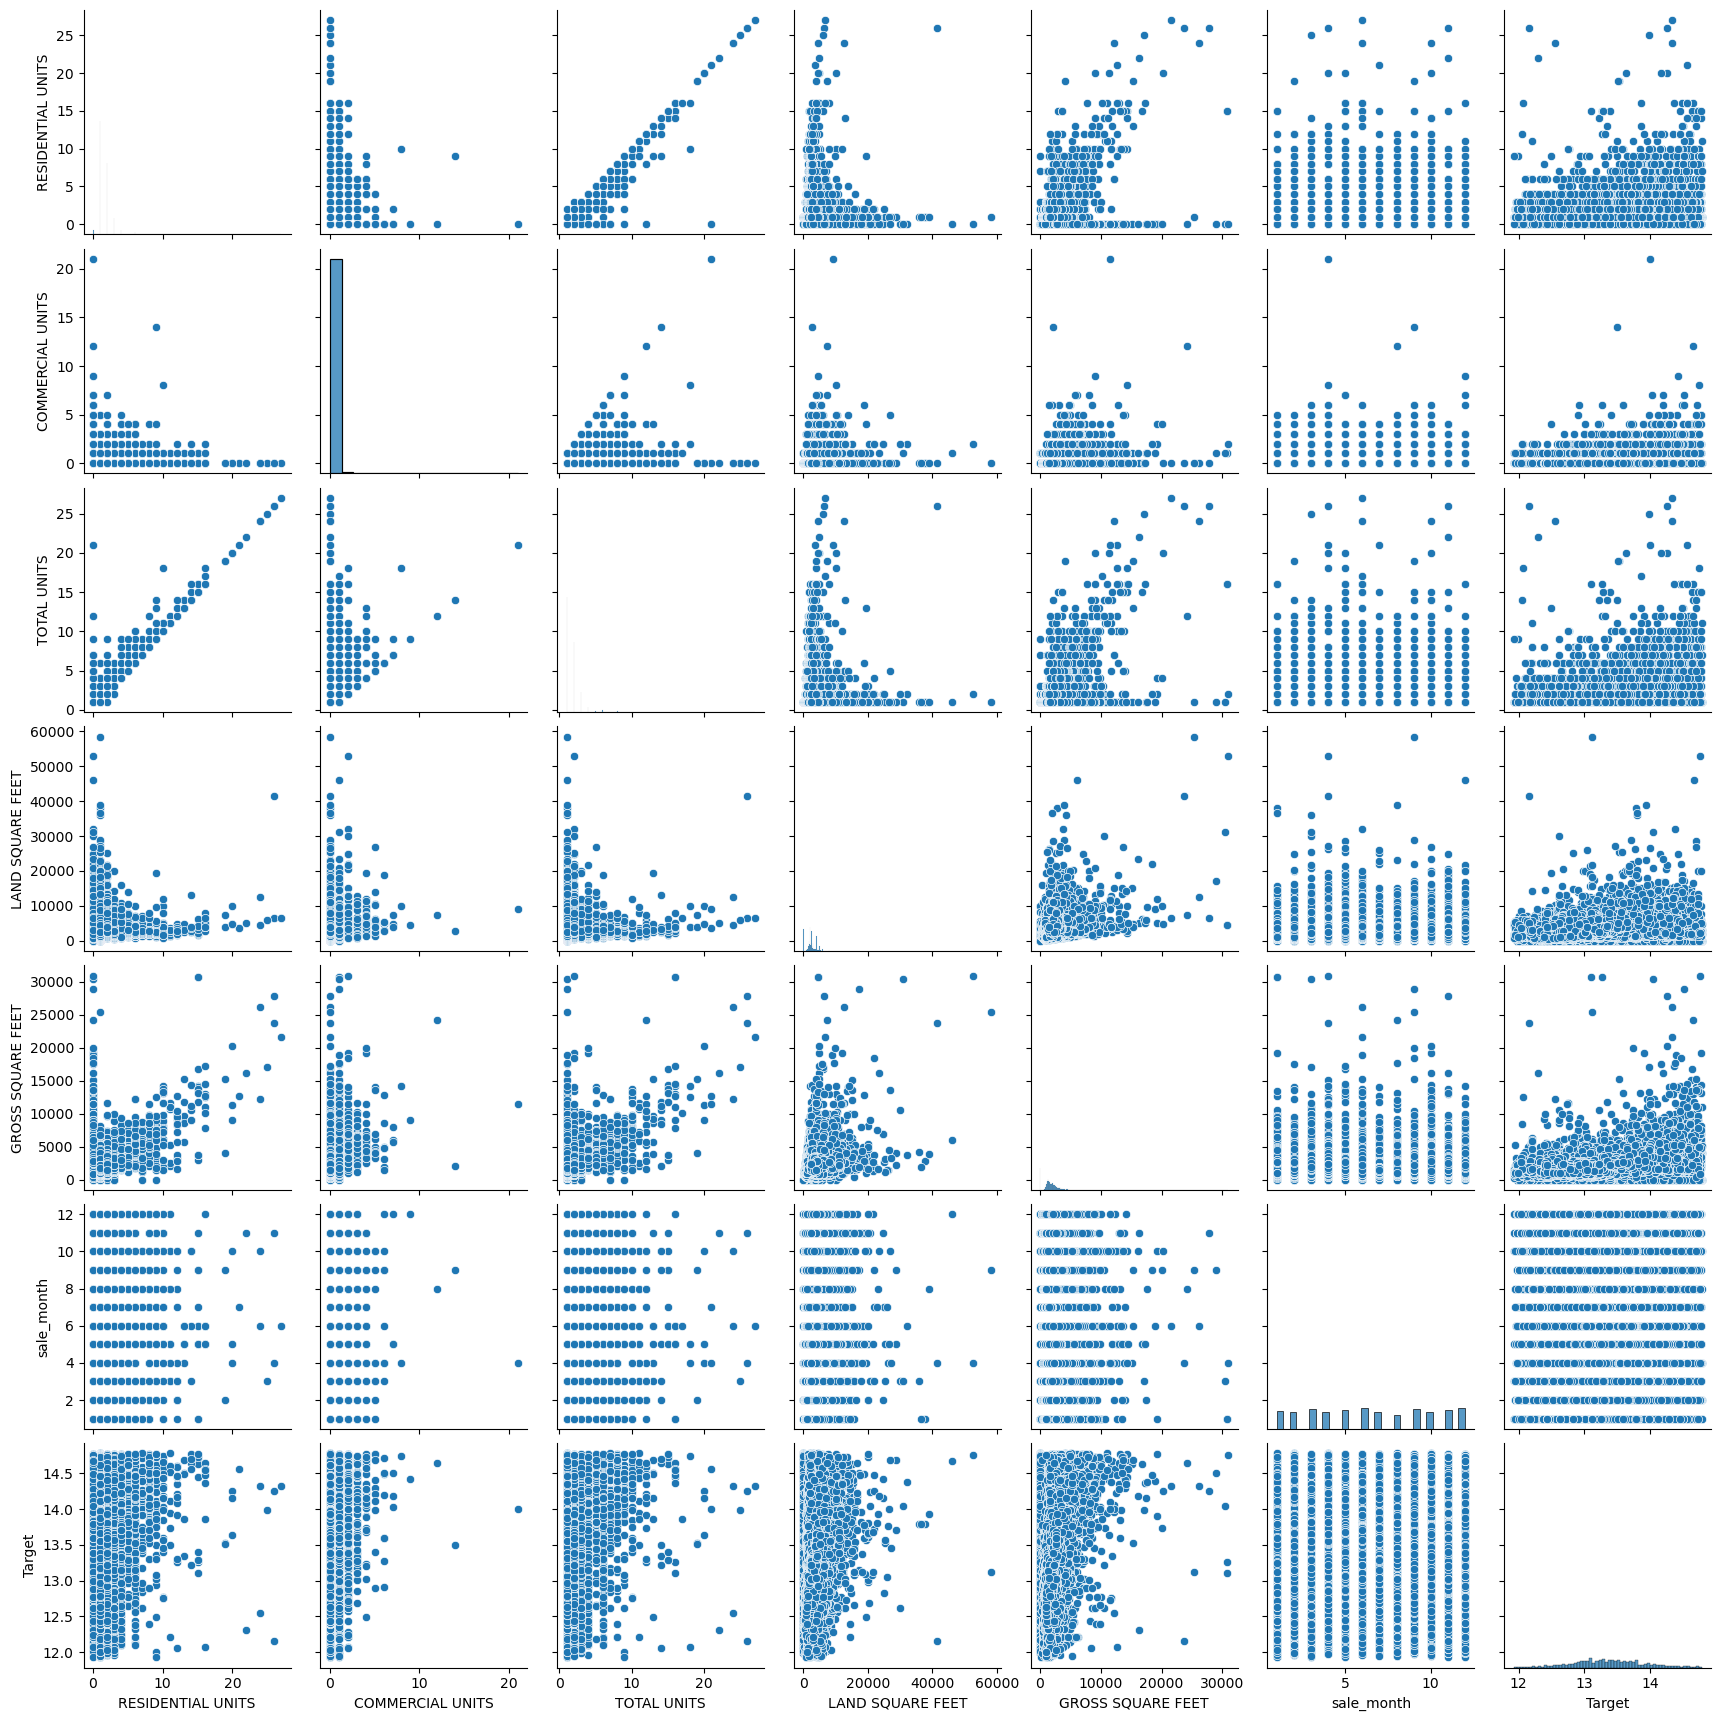

In [32]:
sns.pairplot(data=df_corr)
plt.show()

It would appear that the Total Units variable is colinear with the residential units variable and we should remove it. 

In [33]:
# setting the feature space
y = df['Target']
X = df.drop(columns=['Target','TOTAL UNITS'], axis=1, inplace = False)

In [34]:
X = pd.get_dummies(X, drop_first=True)

len(X.columns)

831

There are now 843 variables in the data!

### Train and Test Split

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#getting new list of numeric variables
X_non_categorical = X.select_dtypes(include=['float64']).columns.tolist()
X_categorical = X.select_dtypes(include=['category']).columns.tolist()

X_train_sc= scaler.fit_transform(X_train[X_non_categorical])
X_test_sc= scaler.transform(X_test[X_non_categorical])

In [37]:
# we can convert them to dataframes again:
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train[X_non_categorical].columns)
X_train_sc[X_categorical] = X_train[X_categorical].reset_index(drop=True)
X_train_sc.head(10)

,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET
0,-0.549047,-0.201673,-1.307956,-1.369443
1,-0.549047,2.540968,0.835387,-0.304843
2,-0.549047,-0.201673,3.201848,-0.577592
3,-0.549047,-0.201673,-0.358524,-0.454415
4,0.272261,-0.201673,-0.148699,0.849940
5,0.272261,-0.201673,-0.121166,-0.023296
6,0.272261,-0.201673,-0.477203,0.126276
7,1.093569,-0.201673,-0.453467,0.014830
8,-0.549047,-0.201673,1.429257,0.726030
9,0.272261,-0.201673,-0.121166,-0.536533


In [38]:
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test[X_non_categorical].columns)
X_test_sc[X_categorical] = X_test[X_categorical].reset_index(drop=True)
X_test_sc.head(10)

,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET
0,-0.549047,-0.201673,-0.453467,-0.342969
1,-0.549047,-0.201673,0.638380,0.221591
2,-0.549047,-0.201673,-1.307956,-1.369443
3,1.093569,-0.201673,-0.357100,0.126276
4,-0.549047,-0.201673,2.081517,0.023629
5,-0.549047,-0.201673,0.116192,0.258251
6,0.272261,-0.201673,-0.405995,-0.366431
7,-0.549047,-0.201673,0.590909,-0.620850
8,0.272261,-0.201673,-0.428307,-0.199263
9,5.200110,10.768889,1.568824,7.094565


## Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression  

reg_model = LinearRegression()
reg_model.fit(X_train_sc, y_train)

LinearRegression()

In [40]:
y_hat_test = reg_model.predict(X_test_sc)

In [41]:
log_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat_test, 'resid': y_test - y_hat_test})
log_predictions.head()

,actuals,predictions,resid
10472,13.058358,13.319142,-0.260784
27358,13.384728,13.352695,0.032033
11808,13.280210,13.225850,0.054360
5615,14.200092,13.452557,0.747536
27328,13.493927,13.288788,0.205139


In [42]:
MSE_test = np.mean(np.square(log_predictions['resid']))

RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.53

## Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
MSE_CV5 = -cross_val_score(estimator=LinearRegression(), X=X_train_sc, y=y_train, cv=5, scoring="neg_mean_squared_error")
MSE_CV5 = np.mean(MSE_CV5)
np.round(MSE_CV5,3)

0.275

In [45]:
RMSE_CV5 = np.sqrt(MSE_CV5)
np.round(RMSE_CV5,3)

0.524

In [46]:
MSE_CV10 = -cross_val_score(estimator=LinearRegression(), X=X_train_sc, y=y_train, cv=10, scoring="neg_mean_squared_error")
MSE_CV10 = np.mean(MSE_CV10)
np.round(MSE_CV10,3)

0.275

In [47]:
MSE_CV10 = np.sqrt(MSE_CV10)
np.round(MSE_CV10,3)

0.524

The RMSE for the cross fold validation and the RMSE from the test data are almost exaclty the same. This is good because it indicates that we can use cross validation to find the RMSE score before even applying it to the test data. This will allow us to tune before it ever sees the test data. 